<a href="https://colab.research.google.com/github/rkmaccha/myProjects/blob/main/SimpleLinearRegression_Project01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries 


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset : https://www.kaggle.com/techwaker/salary-dataset

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Salary_Data.csv")

In [ ]:
df.shape

(30, 2)

In [ ]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
df.tail(2)

,YearsExperience,Salary
28,10.3,122391.0
29,10.5,121872.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

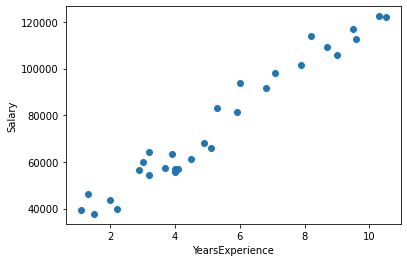

In [ ]:
plt.scatter(x=df['YearsExperience'],y=df['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

In [ ]:
X = df.iloc[ : , :-1]
y = df.iloc[ : , -1]

In [ ]:
X.shape

(30, 1)

In [ ]:
y.shape

(30,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3)

In [ ]:
X_train.shape

(21, 1)

In [ ]:
X_test.shape

(9, 1)

In [ ]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred

array([118227.70997972,  63238.33676494,  34761.69706442,  81895.44553424,
       101534.50739666, 112335.991421  ,  43599.27490251,  53418.80583372,
        52436.8527406 ])

In [ ]:
y_test

27    112635.0
12     56957.0
0      39343.0
18     81363.0
22    101302.0
25    105582.0
3      43525.0
6      60150.0
5      56642.0
Name: Salary, dtype: float64

In [ ]:
pd.DataFrame(np.c_[X_test,y_test,y_pred],columns=["YearExp","SalaryOriginal","Pred_Salary"])

,YearExp,SalaryOriginal,Pred_Salary
0,9.6,112635.0,118227.709980
1,4.0,56957.0,63238.336765
2,1.1,39343.0,34761.697064
3,5.9,81363.0,81895.445534
4,7.9,101302.0,101534.507397
5,9.0,105582.0,112335.991421
6,2.0,43525.0,43599.274903
7,3.0,60150.0,53418.805834
8,2.9,56642.0,52436.852741


In [ ]:
lr.score(X_test,y_test)

0.9676076251880359

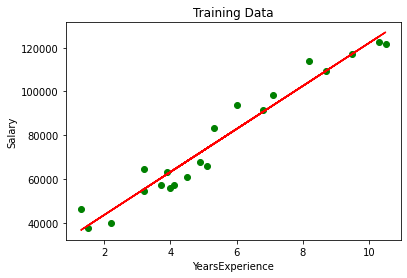

In [ ]:
plt.scatter(X_train,y_train,color="green")
plt.plot(X_train,lr.predict(X_train),color="red")
plt.title("Training Data")
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

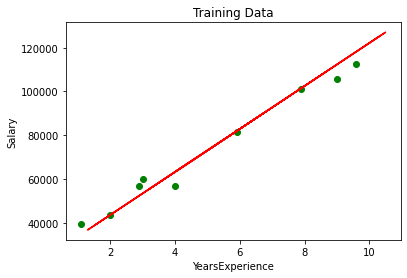

In [ ]:
plt.scatter(X_test,y_test,color="green")
plt.plot(X_train,lr.predict(X_train),color="red")
plt.title("Training Data")
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

In [ ]:
lr.predict([[5]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([73057.86769615])

In [ ]:
# y = mx+c
m= lr.coef_
c= lr.intercept_

In [ ]:
y = m*5 + c

In [ ]:
y

array([73057.86769615])

In [ ]:
import pickle

In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/Salary_pred_model","wb") as f:
  pickle.dump(lr,f)


In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/Salary_pred_model","rb") as f:
  model = pickle.load(f)

In [ ]:
model.predict([[5]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([73057.86769615])